# MSSA Guide

## Load Data Set
This data set contains the data anout the energy consumption for 5 Countries from 1991 to 2008 and available via load_ method

In [1]:
from py_ssa_lib.datasets.load_energy_consumption_df import load_energy_consumption_df

In [2]:
df = load_energy_consumption_df(rawDS=False)

In [3]:
df

,Unnamed: 0,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,0,France,9.73804,9.79360,9.80209,9.78123,10.05206,10.42370,10.36194,10.58991,10.71493,10.85032,11.08966,10.99795,11.11784,11.30309,11.35252,11.37692,11.19392,11.29033
1,1,Canada,11.11733,11.46716,11.70631,12.02414,12.21325,12.56482,12.66968,12.35699,12.97692,13.07669,12.87847,13.10786,13.52061,13.83128,14.16374,13.81736,14.07179,14.02923
2,2,Germany,14.29970,14.03830,14.07232,14.01249,14.38346,14.39479,14.34024,14.32692,14.10906,14.26147,14.61945,14.32545,14.58721,14.70148,14.39950,14.65476,14.18592,14.35692
3,3,China,28.15790,29.26608,30.03294,34.11046,34.75640,35.55399,37.74732,37.03964,36.51251,36.35203,38.41214,43.90988,51.15543,62.91903,68.24567,72.89060,78.00135,85.05974
4,4,Netherlands,3.49513,3.46788,3.53898,3.50781,3.57542,3.73327,3.69939,3.69151,3.68246,3.79417,3.92984,3.93964,4.00102,4.11195,4.22233,4.13898,4.37748,4.32717


We get rid of unwanted columns

In [4]:
df = df.iloc[:,1:]

In [5]:
df

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,France,9.73804,9.79360,9.80209,9.78123,10.05206,10.42370,10.36194,10.58991,10.71493,10.85032,11.08966,10.99795,11.11784,11.30309,11.35252,11.37692,11.19392,11.29033
1,Canada,11.11733,11.46716,11.70631,12.02414,12.21325,12.56482,12.66968,12.35699,12.97692,13.07669,12.87847,13.10786,13.52061,13.83128,14.16374,13.81736,14.07179,14.02923
2,Germany,14.29970,14.03830,14.07232,14.01249,14.38346,14.39479,14.34024,14.32692,14.10906,14.26147,14.61945,14.32545,14.58721,14.70148,14.39950,14.65476,14.18592,14.35692
3,China,28.15790,29.26608,30.03294,34.11046,34.75640,35.55399,37.74732,37.03964,36.51251,36.35203,38.41214,43.90988,51.15543,62.91903,68.24567,72.89060,78.00135,85.05974
4,Netherlands,3.49513,3.46788,3.53898,3.50781,3.57542,3.73327,3.69939,3.69151,3.68246,3.79417,3.92984,3.93964,4.00102,4.11195,4.22233,4.13898,4.37748,4.32717


##  MSSA

### Setup

We start with the import of the class MSSA

In [6]:
from py_ssa_lib.MSSA import MSSA

Then it is necessary to define the parameters for the MSSA 

In [7]:
idx_start = 1 # the index of the first column where time series begin
window_size = 7 # the most important parameter of the MSSA, also denoted as L in the literature
decomposition = "svd" # for svd decomposition use either "svd", or "rand_svd" for full and approximated svd decomposition

The window size $L$ is the most important parameter as it defines the size of the trajectory matrices. This matrix is essential and is decomposed using the $SVD$ Decomposition. The corresponding parameter allows to choose between the full $SVD$ which outputs all eigenvalues and eigenvectors, and **randomized SVD**, which preserves only the $L/2 - L/3 - 1$ largest eigenvalues and is extremely useful when the time series is large, e.g $N$ or $M$ > 100, where $N$ is a number of columns containing nummeric value/record for the time step in the time series (here, $N=18$), and  $M$-number of times series in the data set (here, $M=5$)

### Fit MSSA to the Dataset

Now we are set to initialize and fit our MSSA on th data set

In [8]:
# mssa_inst = MSSA(Verbose=True) # uncomment this section to output inner parameters of the instance
mssa_inst = MSSA()
mssa_inst.fit(df=df, L=window_size, decomposition=decomposition, idx_start_ts=idx_start )


### Grouping Components for the Reconstruction

There are 2 methods available for the grouping of eigentriples and consequently, the elementary matrices. These are used for the reconstruction of the particular components of the fited time series.
Both of them are visual:

#### Inspect the Behaviour of the Lefthand-side Eigenvectors $U$ and the Contribution of the Corresponding Eigenvalues

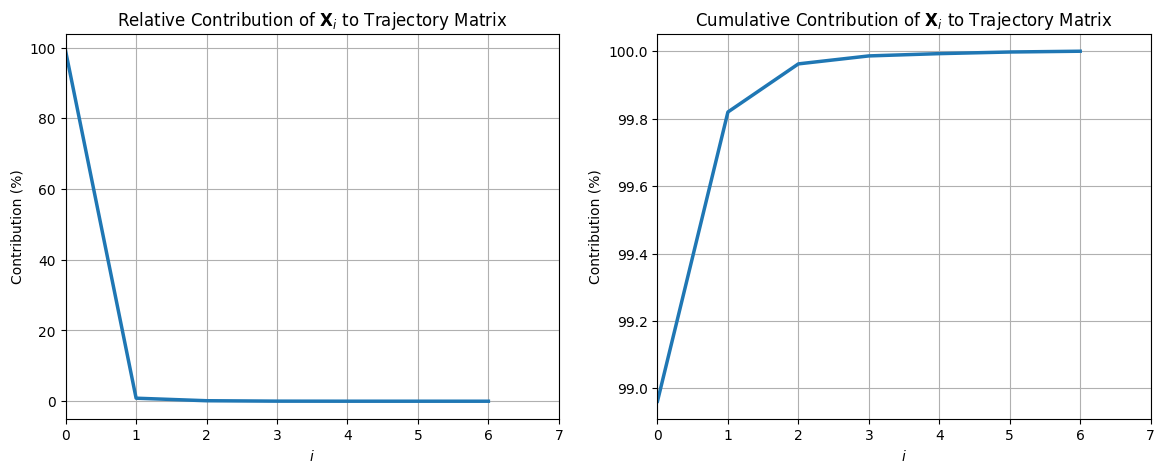

In [9]:
mssa_inst.plot_eigenvals_contribution()

Generally, $U$ can consist of a large number of column vectors, so for the better visualization it is better to limit number of displayed eigenvectors. 

The function **plot_eigenvectors(i_start=start_i, i_end=end_i)** has 2 parameters which are used for slicing $U$ and the last index is less or equal the total number of eigenvalues

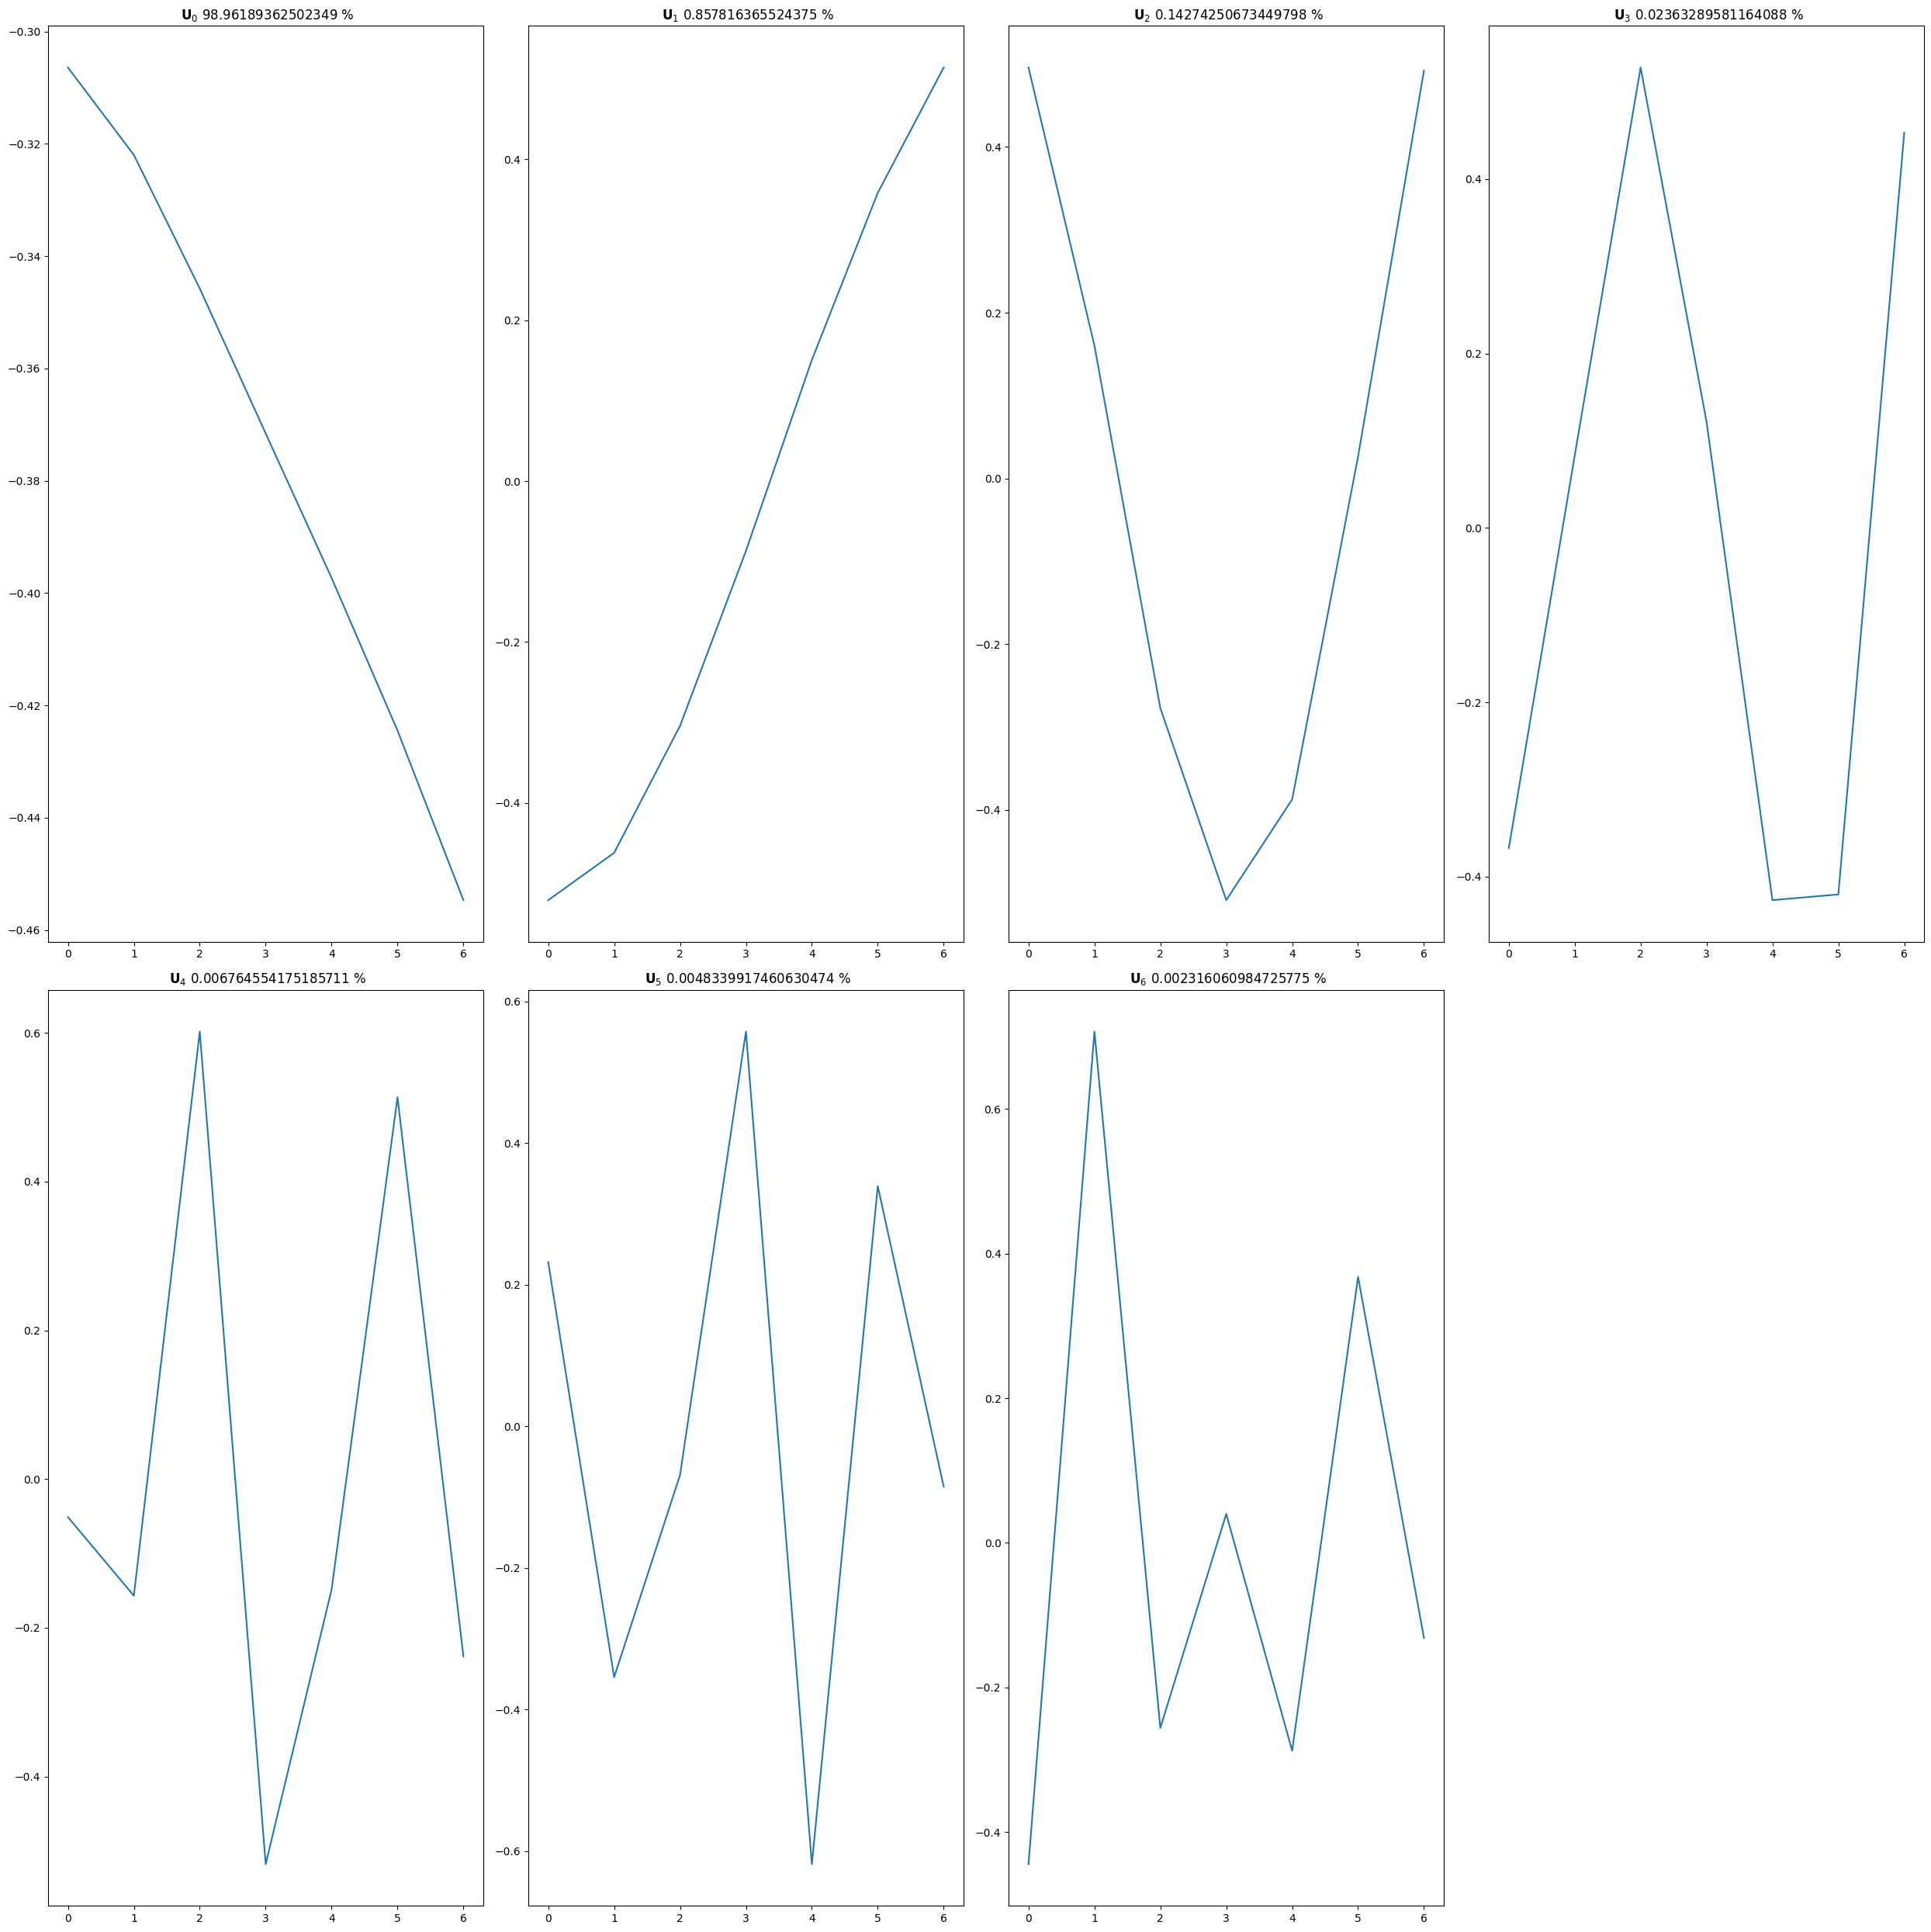

In [10]:
start_i = 0
end_i = mssa_inst.d # or less !
mssa_inst.plot_eigenvectors(i_start=start_i, i_end=end_i)

According to the figures above one can notice that the largest contribution of the eigenvalues is associated with the first component $U_0$, whose magnitude decreases monotonously without any oscillations.

This is the trend component.The seasonal component can be associated with $U_1$ to $U_3$ as they demonstrate slight oscillations and their contribution is similar.

The rest components $U_4$ to $U_6$ are associated with the noise component due to lesser contribution and greater fluctuations.


#### Investigate the Weighted Correlation Matrix

The weighted correlation matrix is the second tool that help us to assess the correlation between components visually and group the most correlated components together. It reconstructs the time series components from each elementary matrix $X_i$ and measures their correlation.

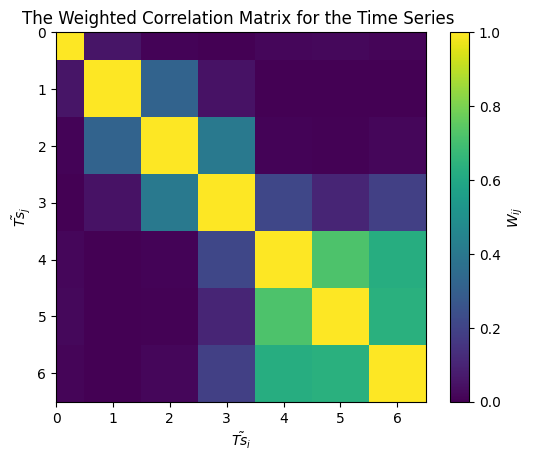

In [11]:
mssa_inst.plot_weighted_correlation_matrix()

According to the figure above, one can pick the first component $X_0$ as the trend, group the components $X_4$ - $X_6$ into the noise component due to their high correlation, while the $X_1$ - $X_3$ components can be separeted into 3 seasonal components because of their moderate correlation, or merged into one. Here we merge them for the simplicity sake.

### Component Reconstruction

Alright, by now we have grouped the elementary matrices into 3 groups:
- Trend: $X_0$
- Season: $X_1$, $X_2$, $X_3$
- Noise: $X_4$, $X_5$, $X_6$

We can reconstruct the components as follows:

**Reconstructed Trend**

In [12]:
trend_comp_ix = [0] # index of the corresponding component, must be either list or numpy.array-> iterable
trend_comp_ts = mssa_inst.reconstruct_ts(idx_chosen_components=trend_comp_ix, return_as_df=True)
trend_comp_ts

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,France,8.056042,8.312656,8.644742,9.013875,9.404859,9.807363,10.226094,10.360937,10.493739,10.621278,10.734868,10.825929,11.21129,11.64108,12.07618,12.509182,12.944431,13.405362
1,Canada,9.670921,9.97902,10.391402,10.844448,11.3028,11.774719,12.272244,12.431239,12.602869,12.76043,12.910287,13.067225,13.562857,14.120295,14.699403,15.258369,15.850982,16.486184
2,Germany,11.435444,11.729708,12.123396,12.56556,13.03757,13.521097,14.032798,14.060111,14.088109,14.126637,14.160479,14.176176,14.625124,15.127927,15.639234,16.163867,16.679719,17.229692
3,China,26.712012,27.875566,29.215735,30.62756,32.055796,33.633697,35.470352,36.991634,38.954299,41.504116,44.774608,48.910512,52.824873,57.51877,62.666459,68.204302,74.223699,80.839567
4,Netherlands,2.880947,2.965464,3.075972,3.200142,3.334016,3.474318,3.621759,3.664262,3.713518,3.767905,3.829031,3.889479,4.042403,4.217,4.400131,4.584802,4.782841,4.981834


**Reconstructed Seasonal Component**

In [13]:
season_comp_ix = [1,2,3] # index of the corresponding component, must be either list or numpy.array-> iterable
season_comp_ts = mssa_inst.reconstruct_ts(idx_chosen_components=season_comp_ix, return_as_df=True)
season_comp_ts

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,France,1.717437,1.461659,1.101675,0.834159,0.678,0.508827,0.220221,0.195393,0.217524,0.270129,0.283593,0.215718,-0.081807,-0.371615,-0.701958,-1.153305,-1.71961,-2.135636
1,Canada,1.48218,1.478754,1.299521,1.1484,1.011048,0.73395,0.286769,0.150904,0.253701,0.249543,0.064418,0.031826,-0.081964,-0.235385,-0.630398,-1.311131,-1.879125,-2.415275
2,Germany,2.793274,2.357067,1.889716,1.543332,1.264623,0.896759,0.338197,0.187257,0.094438,0.171364,0.300695,0.302896,-0.077482,-0.524286,-1.075417,-1.657188,-2.406377,-2.901446
3,China,1.249648,1.232906,1.706171,2.560606,2.774787,2.537075,1.733417,0.211516,-2.397941,-5.122361,-6.429251,-5.238365,-0.862415,4.369639,6.11299,4.868318,3.335544,4.477512
4,Netherlands,0.607414,0.527988,0.421218,0.323908,0.272262,0.219435,0.09203,0.019925,-0.017083,0.030782,0.072469,0.064228,-0.02572,-0.114697,-0.214153,-0.37461,-0.468441,-0.623645


**Reconstructed Noise Component**

In [14]:
noise_comp_ix = [4,5,6] # index of the corresponding component, must be either list or numpy.array-> iterable
noise_comp_ts = mssa_inst.reconstruct_ts(idx_chosen_components=noise_comp_ix, return_as_df=True)
noise_comp_ts

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,France,-0.035439,0.019285,0.055674,-0.066804,-0.030799,0.10751,-0.084375,0.033579,0.003667,-0.041087,0.071199,-0.043697,-0.011643,0.033624,-0.021702,0.021043,-0.030901,0.020604
1,Canada,-0.035771,0.009386,0.015387,0.031292,-0.100598,0.056151,0.110666,-0.225153,0.12035,0.066717,-0.096235,0.008809,0.039716,-0.053629,0.094735,-0.129878,0.099933,-0.04168
2,Germany,0.070982,-0.048474,0.059207,-0.096402,0.081267,-0.023066,-0.030754,0.079552,-0.073487,-0.03653,0.158277,-0.153622,0.039568,0.097839,-0.164317,0.148081,-0.087422,0.028674
3,China,0.19624,0.157609,-0.888966,0.922294,-0.074182,-0.616782,0.543551,-0.16351,-0.043848,-0.029725,0.066783,0.237733,-0.807028,1.030621,-0.533779,-0.18202,0.442107,-0.257339
4,Netherlands,0.006769,-0.025572,0.04179,-0.01624,-0.030858,0.039517,-0.014399,0.007323,-0.013975,-0.004516,0.028341,-0.014068,-0.015663,0.009648,0.036353,-0.071212,0.06308,-0.031019


Then we can plot the reconstructed components to check the validity of the results. **The sum of the reconstructed time series must converge to the original time series**.

For this purpose we introduce a **full_rec** variable which contains the values of the sum of the reconstructed time series for each country. 

One can isolate desired time series, e.g clean the data from the noise by excluding the corressponding reconstructed time series from the sum in **full_rec**.

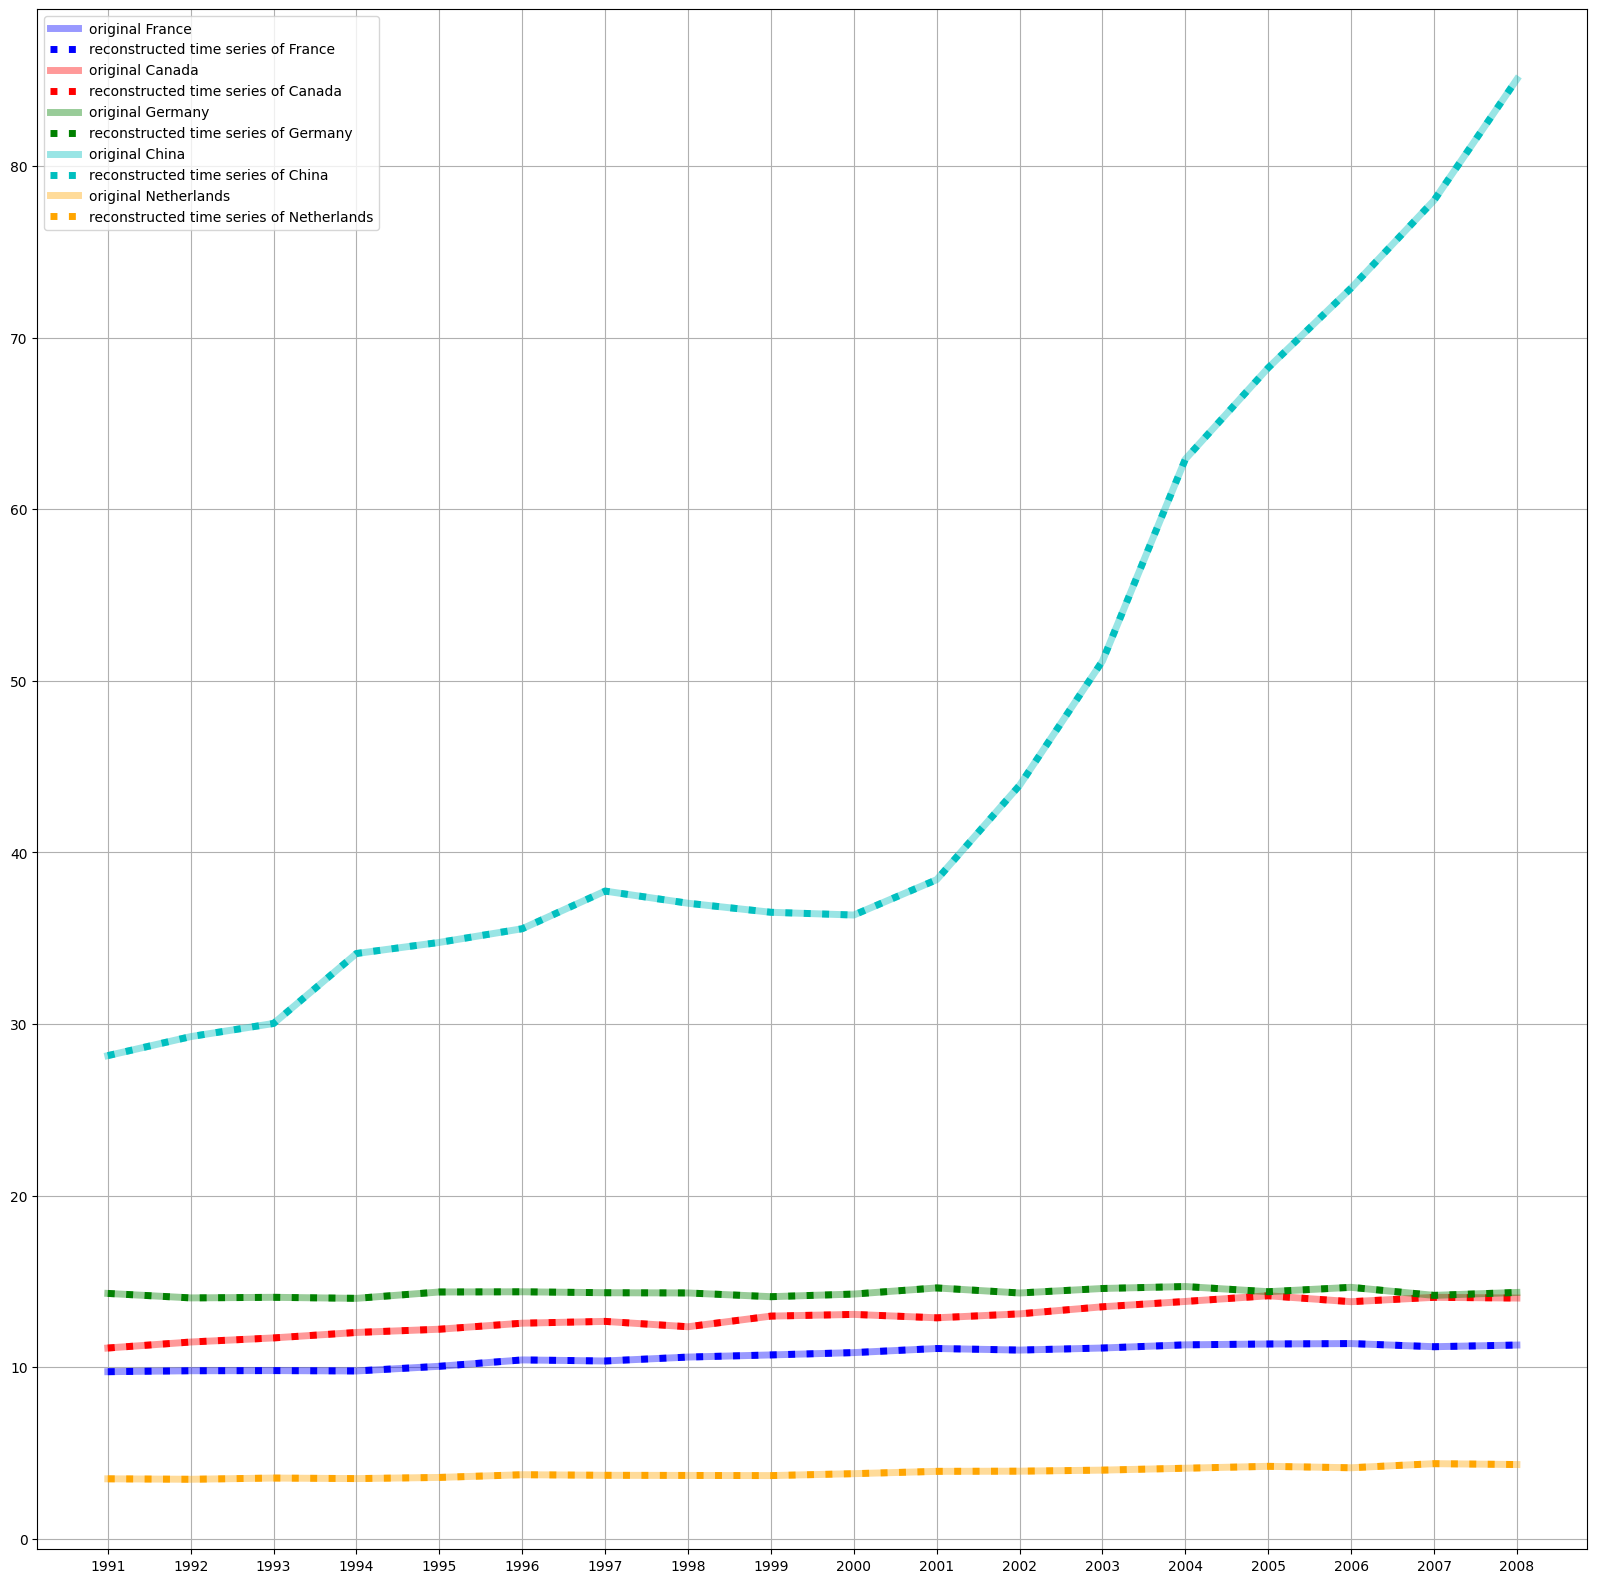

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20, 20))
col=["b","r", "g", "c","orange", "purple", "pink", "gray"]
for i in range(df.shape[0]):
        plt.plot(   df.columns[idx_start:], df.iloc[i,idx_start:],ls='solid',alpha=0.4, color=col[i], lw=5,label=f"original {df.iloc[i,0]}" )
        full_rec = np.array([ trend_comp_ts.values[i,idx_start:]]   + season_comp_ts.values[i,idx_start:] + noise_comp_ts.values[i,idx_start:] ).flatten() # contains i-th time series
        plt.plot(df.columns[idx_start:], full_rec,    ls=':', color=col[i] ,lw=5, label=f"reconstructed time series of {df.iloc[i,0]}")
    
        plt.legend()
        plt.grid()

### Forecast Future Values

It is also possible to use MSSA to predict future values for the multiple time series at once!
The **MSSA** class in the **py-ssa-lib** implements so-called **L-Forecast** Method using **Linear Recurrence Relation(LRR)**.

Note that for the forecasting values **MSSA** uses the same **LRR** for all time series extracted from the signal subspace.

Therefore, it might be less precise compared to the ordinary **SSA**, which computes the **LRR** for each time series.
One can predict values for each of the reconstructed component using corresponding indices, or for the original time series.

For example,  we want to forecast $M=3$ values for the *denoised* time series. 

For this purpose, we group the trend and the seasonal components together and input indices of the elemenatary components used for their reconstruction as follows:

In [40]:
M_ = 3 # number of values to "predict"
idx_denoised = [0,1,2,3] # indices of the components
denoised_given_and_future_values = np.zeros((trend_comp_ts.values[:,idx_start:].shape[0],trend_comp_ts.values[:,idx_start:].shape[1]+M_ ,len(idx_denoised)))
for i in idx_denoised:
    # reconstruct EACH component separetely and predict future values
    i_comp = mssa_inst.reconstruct_ts(idx_chosen_components=[i], return_as_df=True)
    denoised_given_and_future_values[:,:,i] = mssa_inst.L_Forecast(ts = i_comp.values[:,idx_start:] , M=M_, idx_components=[i], mode='forward')
    

To display only the $M$ predicted values for each of components, we can mask the resulting array as follows:

In [39]:
idx_ = 0 # or any other index from the idx_denoised
denoised_given_and_future_values[:,:,idx_][:,-M_:]

array([[15.3853139 , 16.30636367, 17.32217239],
       [18.77296404, 19.91584196, 21.17235366],
       [19.89430038, 21.06443616, 22.36201607],
       [83.41525596, 89.70289182, 96.34778391],
       [ 5.63838004,  5.98669712,  6.36885741]])

Similarly, we can predict values for each component. The sum of obtained values results in a forecast for the original time series. We can do this as follows:


In [23]:
M_ = 5# number of  values to "predict"
idx_all = [0,1,2,3,4,5,6] # indices of the components
all_given_and_future_values =  np.zeros((trend_comp_ts.values[:,idx_start:].shape[0],trend_comp_ts.values[:,idx_start:].shape[1]+M_ ))
for i in idx_all:
    # reconstruct EACH component separetely and predict future values
    i_comp = mssa_inst.reconstruct_ts(idx_chosen_components=[i], return_as_df=True)
    all_given_and_future_values[:,:] += mssa_inst.L_Forecast(ts = i_comp.values[:,idx_start:] , M=M_, idx_components=[i], mode='forward')




The original time series along with the forecasted values can be then visualized. 

Recall that **all_given_and_future_values** contains the values both for the given period and the future. In order to get only predicitions  we need to mask the array.

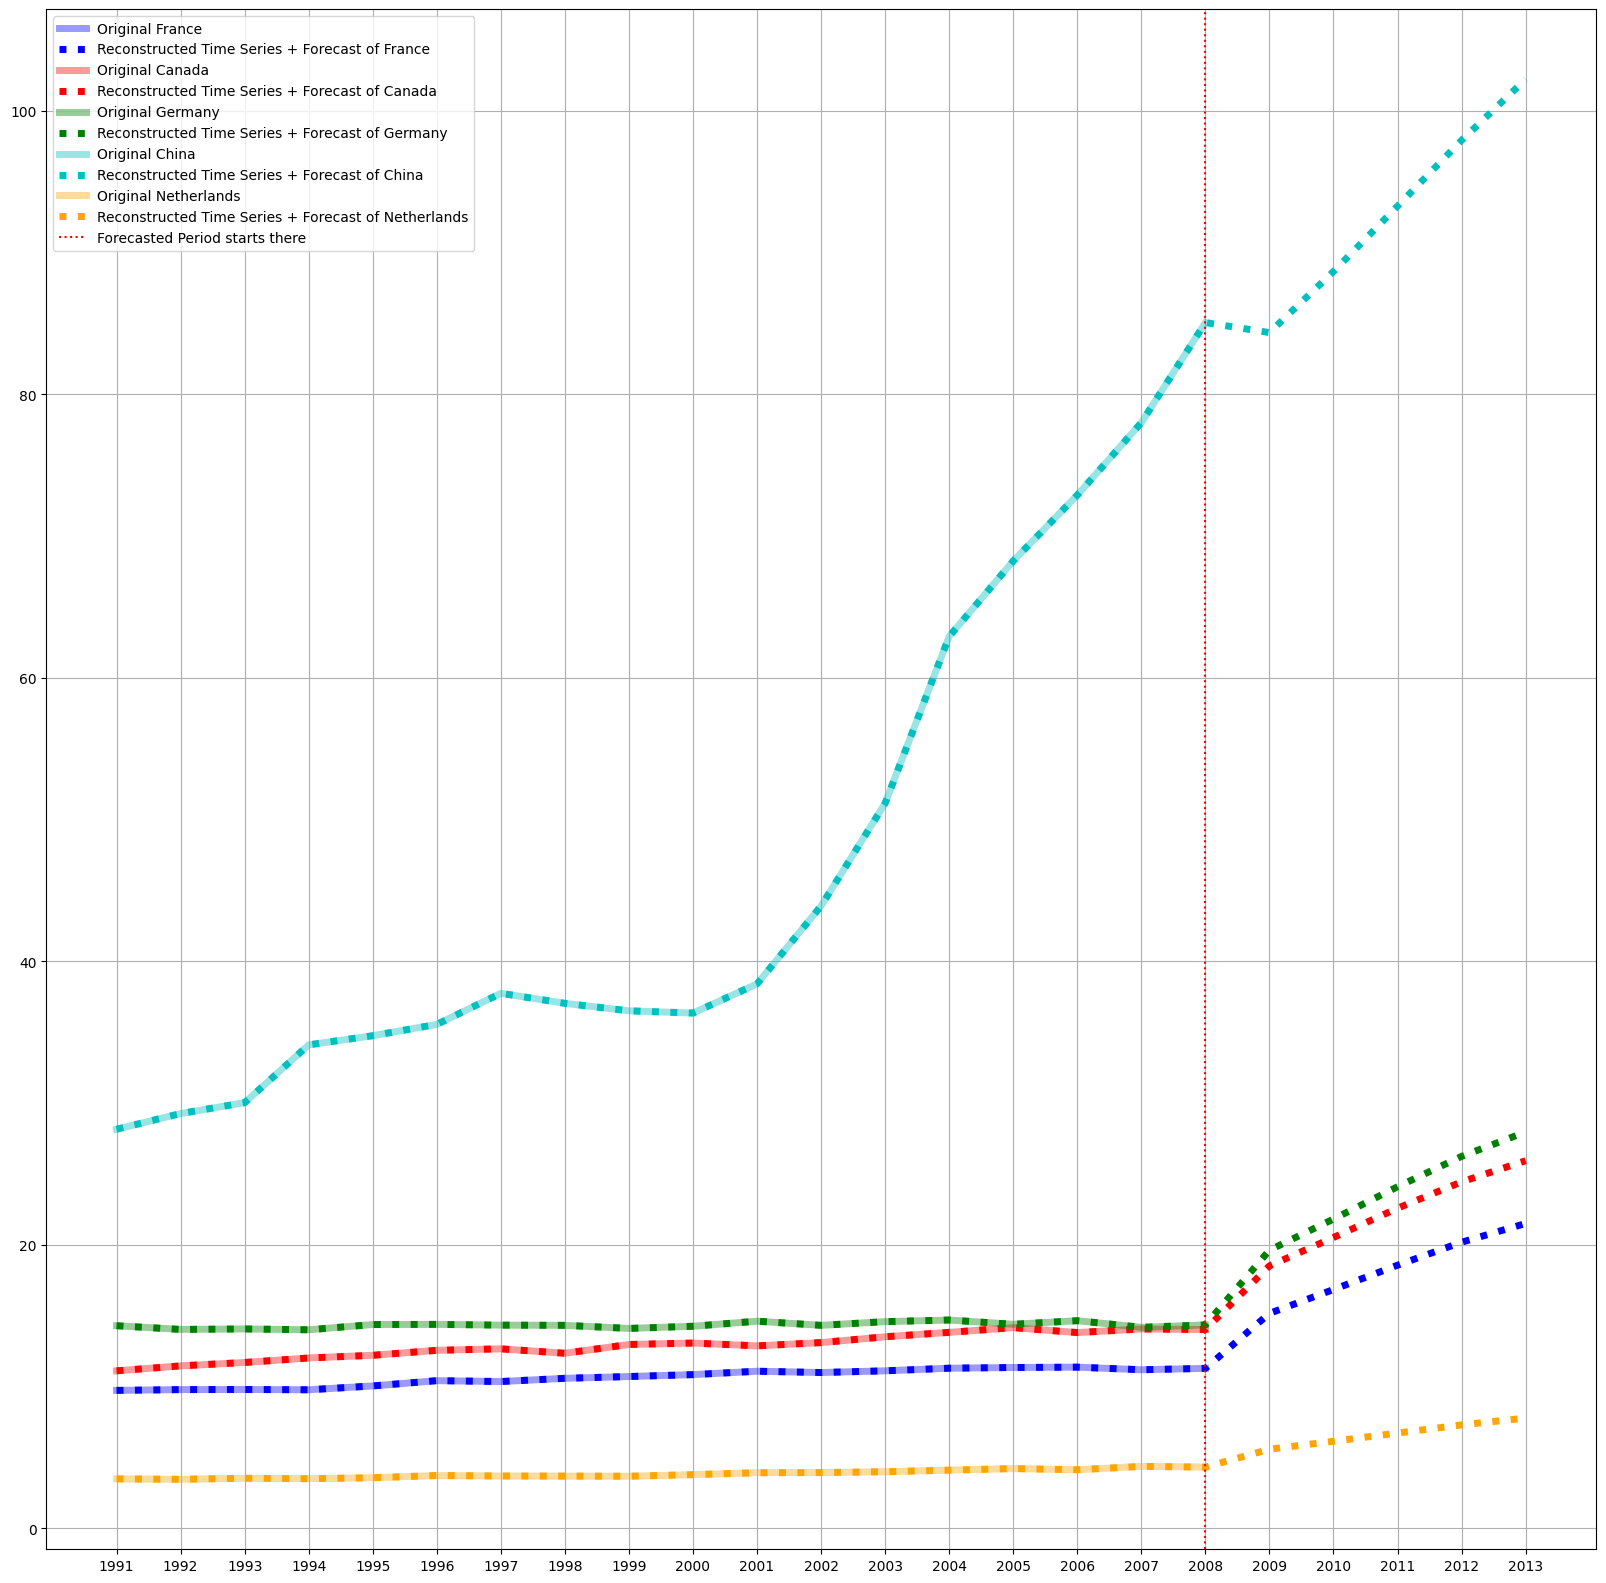

In [29]:
plt.figure(figsize=(20, 20))
for i in range(df.shape[0]):
        plt.plot(   df.columns[idx_start:], df.iloc[i,idx_start:],ls='solid',alpha=0.4, color=col[i], lw=5,label=f"Original {df.iloc[i,0]}" )
        
        plt.plot(list(df.columns[idx_start:])+[str(int(df.columns[-1]) +i) for i in range(1,M_+1)], all_given_and_future_values[i,:],    ls=':', color=col[i] ,lw=5, label=f"Reconstructed Time Series + Forecast of {df.iloc[i,0]}")
        
plt.axvline(df.columns[-1], ls=":", color="red", label = "Forecasted Period starts there")
plt.legend()
plt.grid()

### Estimating the Last M values of the Given Time Series

### Estimation of the LRR Coefficients

The L-forecasting method heavily relies on the estimated **LRR-Coefficients**. One can estimate them as follows: 

In [34]:
mssa_inst.estimate_LRR(idx_components= np.arange(mssa_inst.L-1))

array([-3.37963491,  5.37762467, -1.94664232,  0.30388473, -2.18599684,
        2.79727907])

**Note :** the maximal number of used elementary components  should not exceed $L-1$. Otherwise, the verticality coefficient would sum up to 1, which does not yield the correct result.

### ESPRIT

It is also possible to estimate the parameters of the sinusoids comprising the signal by using **ESPRIT** algorithm. The ouptut result represents the complex roots of the characteristic polynom $\mu$, which can be decomposed into real $\omega$ and imaginary $\rho$ components.

In [35]:
mssa_inst.estimate_ESPRIT(idx_components= np.arange(mssa_inst.L-1), decompose_rho_omega= False)

array([ 1.53731933+0.j        ,  1.02075051+0.j        ,
        0.91937979+0.86871024j,  0.91937979-0.86871024j,
       -0.79977518+0.84053256j, -0.79977518-0.84053256j])

Again, **note :** the maximal number of used elementary components  should not exceed $L-1$. Otherwise, the result is invalid.
One can plot the roots on the unit circle as follows:

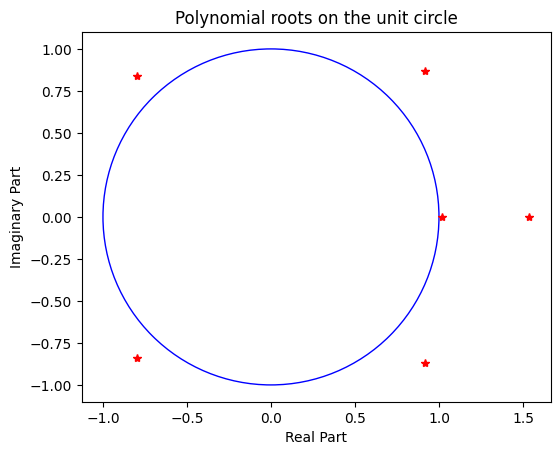

In [36]:
mssa_inst.plot_polynomial_roots(idx_components= np.arange(mssa_inst.L-1))